## 3 회귀분석(Regression Analysis)
+ 선형 회귀분석
+ 다변량 회귀분석
+ 로지스틱 회귀분석

### 1. 회귀 모델
**회귀**<sup>regression</sup>: 회귀 분석은 대표적인 지도학습 알고리즘
+ 관측된 데이터를 통해 독립변수와 종속 변수 사이의 숨어있는 관계를 추정하는 방식

### 2. 선형 회귀와 지도학습
데이터에 제시된 목표값을 정답값 혹은 **레이블**<sup>label</sup>이라고 부름
+ 지도 학습은 주어진 입력-출력 쌍을 학습한 후에 새로운 입력값이 들어왔을 때, 합리적인 출력값을 예측하는 것.

### 3. 실제 데이터를 읽고 가설 만들어 보기

아래와 같이 판다스를 이용하여 CSV 파일을 읽어 lin_data라는 데이터프레임을 만듬

투입량에 따른 오염도 측정 결과 100건이 담겨있음
input: 오염도를 줄이기 위한 약품의 투입량
pollution: 실제 측정된 오염도 수치

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
# 데이터 저장 위치
data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv') # 데이터 파일 이름
print(lin_data)

       input  pollution
0   0.240557   4.858750
1   0.159731   4.471091
2   0.108295   4.341897
3   0.233770   3.586844
4   0.283235   3.678243
..       ...        ...
95  0.070824   4.851617
96  0.055300   4.912696
97  0.138229   5.516441
98  0.007205   5.661260
99  0.290294   3.169049

[100 rows x 2 columns]


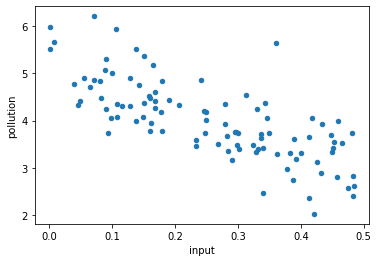

In [2]:
# 데이터를 시각적으로 확인하기 위하여 plot() 메소드를 사용.
lin_data.plot(kind="scatter", x="input", y="pollution")
# 투입량을 늘이면 오염도가 줄어드는 경향이 있는 것을 확인할 수 있음

두 변수들이 input을 독립변수 x로, pollution을 종속변수 y로 하는 y = wx + b 라는 직선으로 표현하면, 데이터가 이 함수를 따를 것이라는 **가설**<sup>hypothesis</sup>을 제시한 것

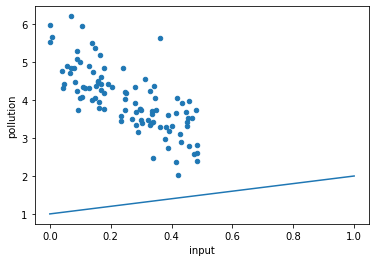

In [3]:
w, b = 1, 1
x0, x1 = 0.0, 1.0
def h(x, w, b): # 가설에 따라 값을 계산하는 함수
  return w*x + b

# 데이터(산포도)와 가설(직선)을 비교
lin_data.plot(kind="scatter", x="input", y="pollution")
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)])

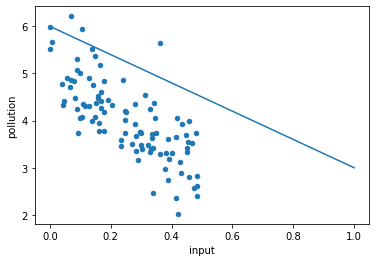

In [4]:
w, b = -3, 6
x0, x1 = 0.0, 1.0

# 새로운 파라미터로 가설(직선)과 데이터(산포도) 비교
lin_data.plot(kind="scatter", x="input", y="pollution")
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)])

### 4. 좋은 가설과 모델의 오차
데이터를 추정하는 가설이 얼마나 정확한지를 평가하는 방법
+ 가설이 훌륭한 모델이라면 데이터는 가설이 나타내는 직선 근처에 있을 것

대표적인 오차 척도는 **평균 제곱 오차**<sup>mean square error:MSE</sup>

$ E_{mse} = {1 \over m} \sum_{i=1}^m (\hat y_i - y_i)^2 $

In [5]:
# 평균 제곱 오차
import numpy as np
y_hat = np.array([1.2, 2.1, 2.9, 4.1, 4.7, 6.3, 7.1, 7.7, 8.5, 10.1])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
diff_square = (y_hat - y)**2
e_mse = diff_square.sum() / len(y)
e_mse

0.06099999999999996

In [6]:
# 사이킷런 역시 이러한 오차 계산을 지원
from sklearn.metrics import mean_squared_error
print('Mean squared error', mean_squared_error(y_hat, y))

Mean squared error 0.06099999999999996


제곱을 하지 않고 오차를 더하고 싶다면 **평균 절대 오차**<sup>mean absolute error:MAE</sup>라는 것을 사용할 수 있음

$ E_{mae} = {1 \over m} \sum_{i=1}^m | \hat y_i - y_i | $

In [7]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error', mean_absolute_error(y_hat, y))

Mean absolute error 0.20999999999999988


### 7. 오차로 가설을 평가하고 좋은 가설 찾기
+ 벡터화 연산을 사용하여 아래와 같이 직선의 기울기와 절편을 갱신할 수 있음
```
learning_rate = 0.005
w = w - learning_rate * (error * x).sum()
b = b - learning_rate * error.sum()
```

### 8. 기계 학습의 개념으로 해석하는 선형 회귀
선형 회귀의 모델은 선형 방정시깅고, 동작을 결정하는 매개변수는 직선의 기울기 w와 절편 b

벡터로 표현하면 (w,b)가 파라미터 벡터

학습 과정은 오차를 줄이도록 오차 곡면의 경사를 따라 내려가는 최적화 과정

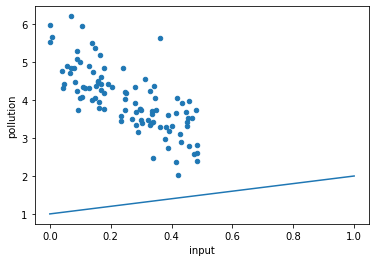

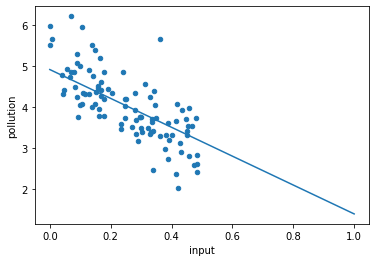

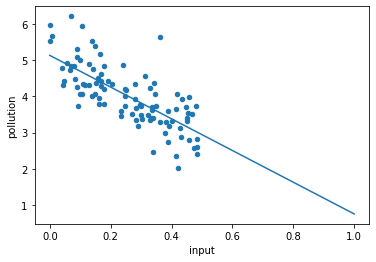

In [10]:
def h(x, param):
  return param[0]*x + param[1]

learning_iteration = 1200    # 하이퍼파라미터 : 학습반복 횟수
learning_rate      = 0.0025  # 하이퍼파라미터 : 학습율로 0.05, 0.001등이 가능

param = [1, 1] # w, b를 하나의 변수로 함

x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()

for i in range(learning_iteration):
  if i % 400 == 0:
    lin_data.plot(kind='scatter', x='input', y='pollution')
    plt.plot([0, 1], [h(0, param), h(1, param)])
  error = (h(x, param) - y)
  param[0] -= learning_rate * (error * x).sum()
  param[1] -= learning_rate * error.sum()

### 9. Scikit-Learn을 이용한 선형 회귀
파이썬에서 가장 많이 사용되는 기계학습 라이브러리를 활용하여 선형 회귀를 구현

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model  # scikit-learn 모듈을 가져온다

data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')

사이킷런의 선형 회귀 모델의 입력 데이터는 2차원 배열로, 각 행이 데이터 인스턴스이며, 각 데이터 인스턴스가 여러 개의 특징값을 가질 수 있음

현재 우리는 하나의 특징값만을 사용하지만 이 경우에도 하나의 원소를 가진 벡터로 제공해야 함

In [15]:
x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
print(x.shape)
x = x[:, np.newaxis] # 선형 회귀 모델의 입력형식에 맞게 차원을 증가시킴
print(x.shape)

(100,)
(100, 1)


In [16]:
# fit() 메소드: 데이터를 기반으로 최적의 선형회귀 모델 생성
regr = linear_model.LinearRegression()
regr.fit(x, y) # 선형 회귀 모델에 데이터를 넣어 학습을 진행함

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

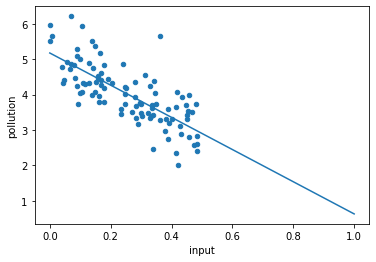

In [17]:
lin_data.plot(kind='scatter', x='input', y='pollution')
y_pred = regr.predict([[0], [1]])
plt.plot([0, 1], y_pred) # x 구간을 0에서 1 사이로 두자

### 10. 다변량 회귀분석 - 수학적 모델
입력에 사용되는 특징이 하나가 아니라 n개라면 선형 회귀 모델은 다음과 같은 식으로 표현할 수 있으며 **다변량**<sup>multivariate</sup> 회귀분석이라 함

$ \hat y = w_1x_1 + w_2x_2 + ... + w_nx_n + b = w^Tx + b $

이때 **w**는 w1, w2, ... , wn을 원소로 하는 벡터이고, **x**는 입력 틀징 x1, x2, ... , xn을 원소로 하는 벡터.

다변량 회귀 분석은 이때 특징 벡터 **x**가 임의의 차원을 가질 수 있는 것을 의미하며, 찾아야 하는 것은 n차원 공간의 **초평면**<sup>hyperplane</sup>이 되는 것

### 11. 회귀 분석의 학습, 혹은 최적화 방법 - 정규 방정식
오차의 기울기를 따라 최적의 파라미터를 찾아가는 방법을 사용하지 않고, **정규 방정식**<sup>normal equation</sup>이라고 부르는 최적의 매개변수 벡터를 찾는 수식

$ \hat \theta = (X^T X)^{-1} X^T y $

In [18]:
data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')
x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
x = x[:, np.newaxis]
X = np.c_[np.ones((100, 1)), x]
print(X.shape)

(100, 2)


In [19]:
# 넘파이의 선형대수 서브 모듈인 linalg를 이용
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([ 5.17550358, -4.54449866])

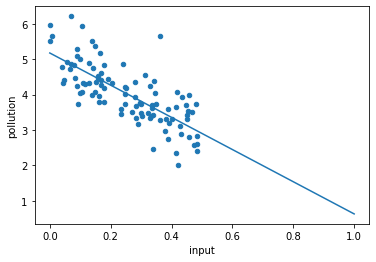

In [20]:
def h(x, theta): # 가설 함수
  return x*theta[1] + theta[0]

# 데이터와 가설을 비교
lin_data.plot(kind='scatter', x='input', y='pollution') # 데이터
plt.plot([0, 1], [h(0, theta), h(1, theta)])            # 가설

### 13. 다변량 선형 회귀 분석을 위한 데이터 확보하기

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 시각화를 위하여 Seaborn 라이브러리를 이용함

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
life.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [22]:
life = life[['Life expectancy', 'Year', 'Alcohol', 'Percentage expenditure', 'Total expenditure', 'Hepatitis B',
             'Measles', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years', 'Thinness 5-9 years']]
print(life)

      Life expectancy  Year  ...  Thinness 1-19 years  Thinness 5-9 years
0                65.0  2015  ...                 17.2                17.3
1                59.9  2014  ...                 17.5                17.5
2                59.9  2013  ...                 17.7                17.7
3                59.5  2012  ...                 17.9                18.0
4                59.2  2011  ...                 18.2                18.2
...               ...   ...  ...                  ...                 ...
2933             44.3  2004  ...                  9.4                 9.4
2934             44.5  2003  ...                  9.8                 9.9
2935             44.8  2002  ...                  1.2                 1.3
2936             45.3  2001  ...                  1.6                 1.7
2937             46.0  2000  ...                 11.0                11.2

[2938 rows x 12 columns]


### 14. 다변량 데이터 특징들 사이의 상관 관계

In [24]:
print(life.shape)
print(life.isnull().sum())

# 결손값이 있는 데이터는 모두 삭제
life.dropna(inplace=True)
print(life.shape)

(2938, 12)
Life expectancy            10
Year                        0
Alcohol                   194
Percentage expenditure      0
Total expenditure         226
Hepatitis B               553
Measles                     0
Polio                      19
BMI                        34
GDP                       448
Thinness 1-19 years        34
Thinness 5-9 years         34
dtype: int64
(1853, 12)


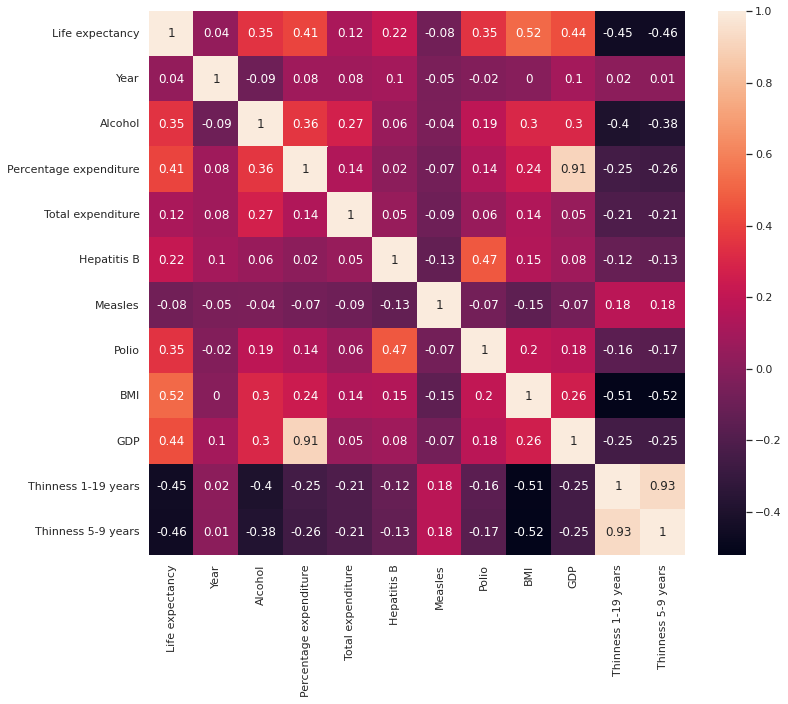

In [25]:
# 판다스 라이브러리의 corr() 함수를 사용하여 상관행렬 행성

sns.set(rc={'figure.figsize':(12,10)})    # 상관행렬 가시
correlation_matrix = life.corr().round(2) # 상관행렬 생성
sns.heatmap(data=correlation_matrix, annot=True)
plt.show() # colab 등 노트북 환경에서는 필요없지만, 콘솔 환경 등에서는 필요

In [26]:
X = life[['Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']
print(X)
print(y)

      Alcohol  Percentage expenditure  ...         GDP  Thinness 1-19 years
0        0.01               71.279624  ...  584.259210                 17.2
1        0.01               73.523582  ...  612.696514                 17.5
2        0.01               73.219243  ...  631.744976                 17.7
3        0.01               78.184215  ...  669.959000                 17.9
4        0.01                7.097109  ...   63.537231                 18.2
...       ...                     ...  ...         ...                  ...
2933     4.36                0.000000  ...  454.366654                  9.4
2934     4.06                0.000000  ...  453.351155                  9.8
2935     4.43                0.000000  ...   57.348340                  1.2
2936     1.72                0.000000  ...  548.587312                  1.6
2937     1.68                0.000000  ...  547.358879                 11.0

[1853 rows x 6 columns]
0       65.0
1       59.9
2       59.9
3       59.5
4       59.

### 15. 훈련데이터를 훈련용과 검증용으로 분리하기

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
# 사이킷런의 LinearRegression 모델을 사용하여 학습을 진행
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

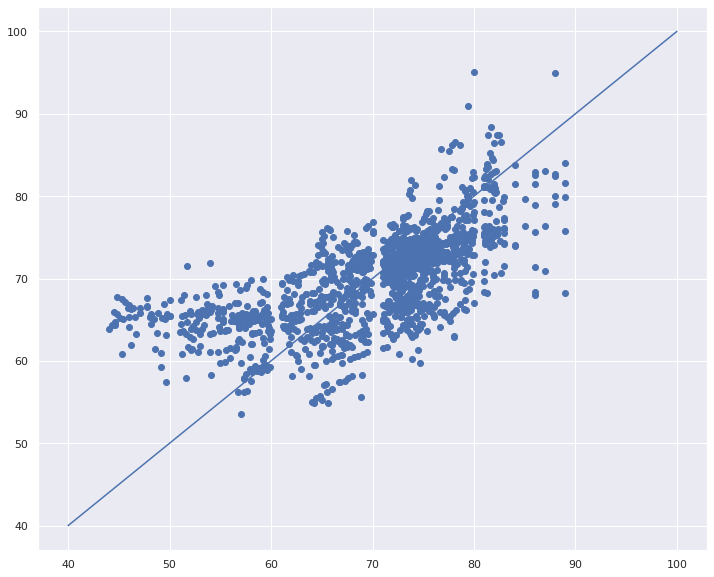

In [29]:
# 예측치가 정답에 일치할수록 직선에 가까움
y_hat_train = lin_model.predict(X_train)
plt.scatter(y_train, y_hat_train)
xy_range = [40, 100]
plt.plot(xy_range, xy_range)

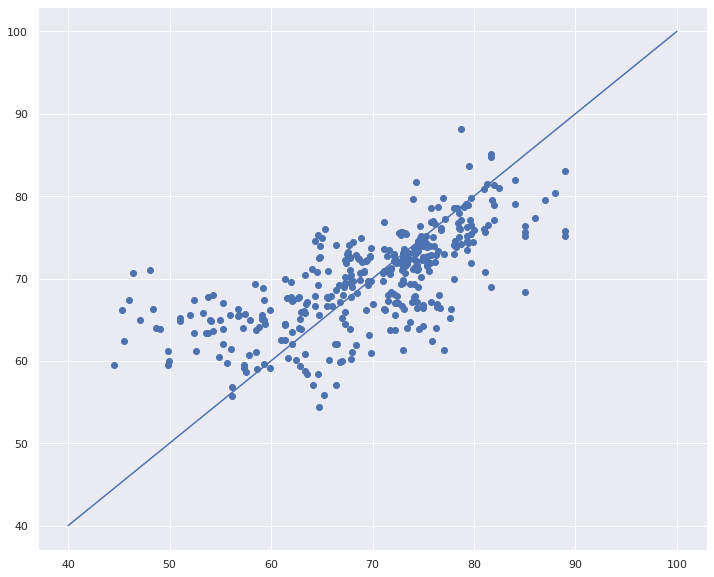

In [30]:
# 예측기가 다른 데이터에도 잘 동작하는지 확인하기 위하여
# 남겨두었던 검증용 데이터 X_test 사용

y_hat_test = lin_model.predict(X_test)

plt.scatter(y_test, y_hat_test) # 검증 데이터와 예측 데이터의 산포도
plt.plot(xy_range, xy_range) # (40,40)에서 (100,100)으로 직선 - 데이터가 이 직선과 일치할수록 예측이 정확

In [ ]:
# 검증 데이터에 대한 예측과 정답을 비교하여 평균 제곱오차를 구함
from sklearn.metrics import mean_squared_error
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

Mean squared error: 40.675400947221355


### 16. 데이터의 정규화를 통한 분석 성능 개선하기
값의 범위가 크게 다른 특징들을 입력 변수로 사용할 경우 적절한 학습이 이루어지지 않을 수도 있음

각각의 특징들이 갖는 값들을 적당한 규모로 변경하는 작업이 필요

\begin{aligned}
\tilde{x} = {x - x_{min} \over x_{max} - x_{min}}
\end{aligned}

입력 데이터를 모두 이러한 방식으로 정규화하면 모든 데이터는 0에서 1 사이의 값을 갖게 됨

In [31]:
from sklearn.preprocessing import normalize

n_X = normalize(X, axis=0) # 정규화를 0번 축 기준으로 실시

In [32]:
# 정규화된 데이터 n_X를 훈련용과 검증용으로 나누어 학습
nXtrain,nXtest,y_train,y_test = train_test_split(n_X, y, test_size=0.2)
lin_model.fit(nXtrain, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

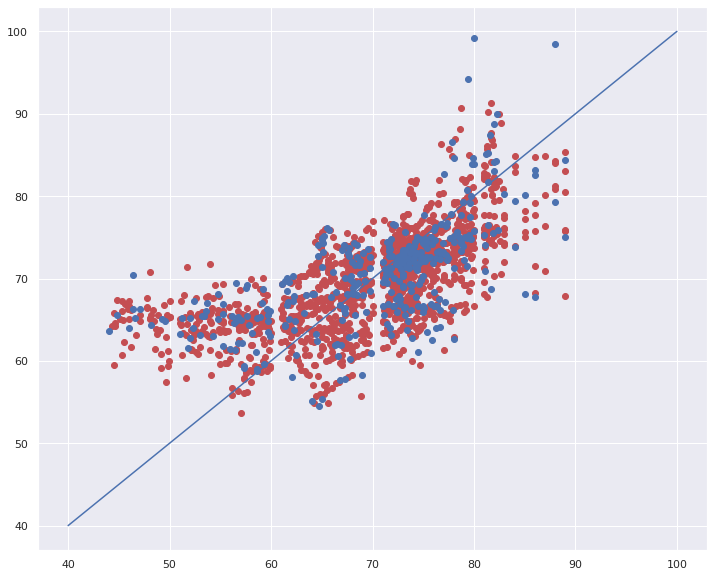

In [33]:
# 학습의 결과로 얻은 선형 회귀 모델을 이용하여 훈련용 데이터와 
# 검증용 데이터를 입력으로 예측치를 구해서 실제 정답과 비교
y_hat_train = lin_model.predict(nXtrain)
y_hat_test = lin_model.predict(nXtest)
plt.scatter(y_train, y_hat_train, color='r')
plt.scatter(y_test, y_hat_test, color='b')
plt.plot(xy_range, xy_range)

In [34]:
# 정확한 오차를 확인하기 위해 평균 제곱오차를 계산
from sklearn.metrics import mean_squared_error
print("mean_squared_error:", mean_squared_error(y_test, y_hat_test))

mean_squared_error: 46.24119691070707


### 17. 데이터의 표준화를 통한 분석 성능 개선하기

(array([[1744.,  109.,    0.,    0.,    0.],
        [1757.,   63.,   24.,    4.,    5.],
        [1853.,    0.,    0.,    0.,    0.],
        [1853.,    0.,    0.,    0.,    0.],
        [1727.,  109.,   10.,    5.,    2.],
        [1740.,  102.,   11.,    0.,    0.]]),
 array([0.        , 0.04591209, 0.09182417, 0.13773626, 0.18364835,
        0.22956043]),
 <a list of 6 Lists of Patches objects>)

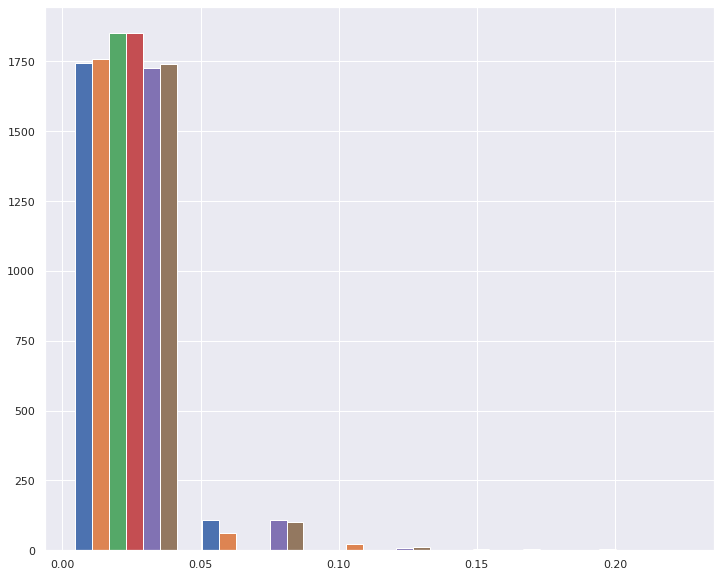

In [35]:
# 정규화를 통해 얻은 n_X 데이터가 어떤 값을 갖는지 matplotlib의 히스토그램을 그려서 확인
plt.hist(n_X, bins=5)
# 대부분의 데이터가 매우 작은 값 쪽에 몰려 있는데
# 이것은 극단적으로 큰 소수의 이상치outlier가 존재하기 때문

(array([[ 449., 1306.,   98.,    0.,    0.],
        [   0., 1765.,   72.,   11.,    5.],
        [ 179., 1674.,    0.,    0.,    0.],
        [ 452., 1399.,    2.,    0.,    0.],
        [   0., 1733.,  108.,    8.,    4.],
        [ 123., 1622.,   97.,   11.,    0.]]),
 array([-3.77113931, -0.94886312,  1.87341306,  4.69568924,  7.51796543,
        10.34024161]),
 <a list of 6 Lists of Patches objects>)

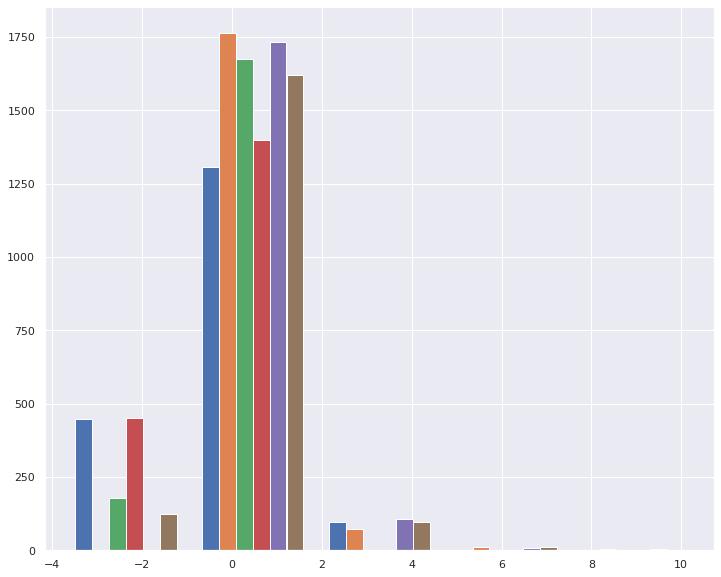

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()     # 표준화 스케일러 생성
s_X = scaler.fit_transform(X) # 표준화 스케일러 적용

plt.hist(s_X, bins=5)         # 표준화 결과의 가시화

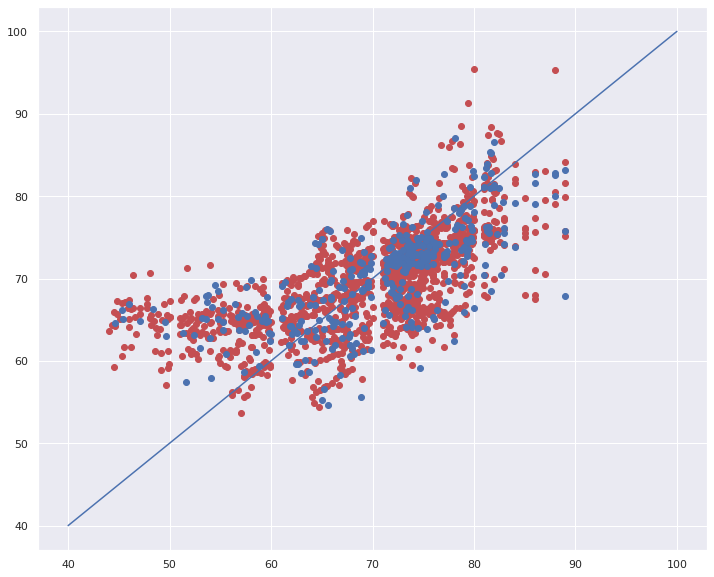

In [37]:
# 분석 성능 확인
sXtrain,sXtest,y_train,y_test = train_test_split(s_X, y, test_size=0.2)
lin_model.fit(sXtrain, y_train)

y_hat_train = lin_model.predict(sXtrain)
y_hat_test = lin_model.predict(sXtest)
plt.scatter(y_train, y_hat_train, color='r')
plt.scatter(y_test, y_hat_test, color='b')
plt.plot(xy_range, xy_range)

In [38]:
from sklearn.metrics import mean_squared_error
print("mean_squared_error:", mean_squared_error(y_test, y_hat_test))

mean_squared_error: 38.54176625345849
